<a href="https://colab.research.google.com/github/ahtisham-maliik/Feature_Engineering/blob/main/Z_Score_02/Z_Score_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

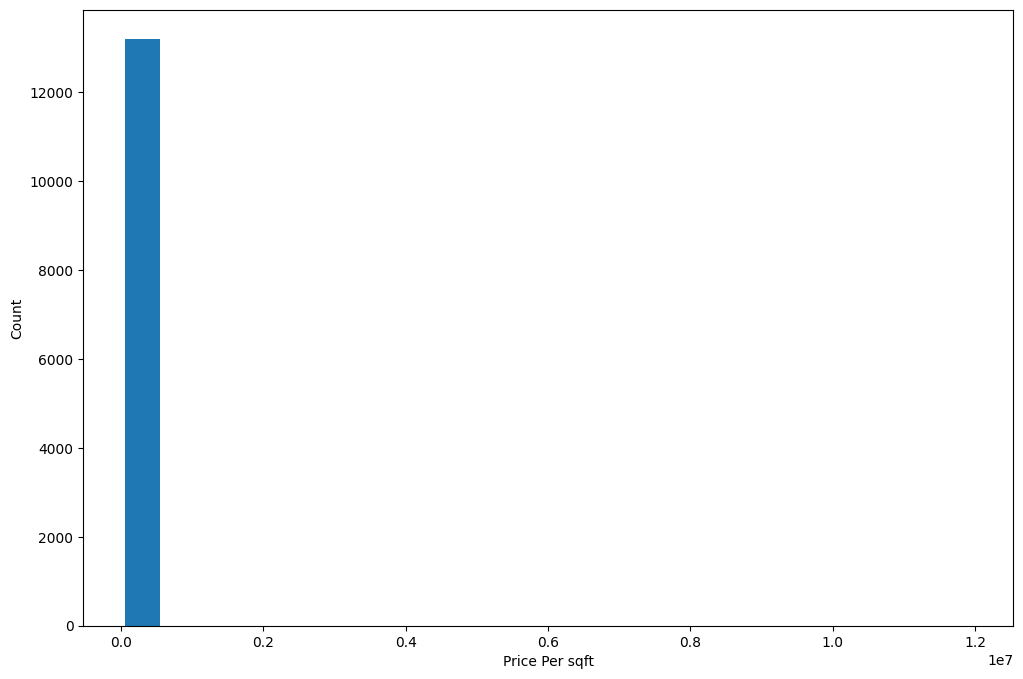

In [4]:
plt.hist(df.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price Per sqft')
plt.ylabel('Count')
plt.show()

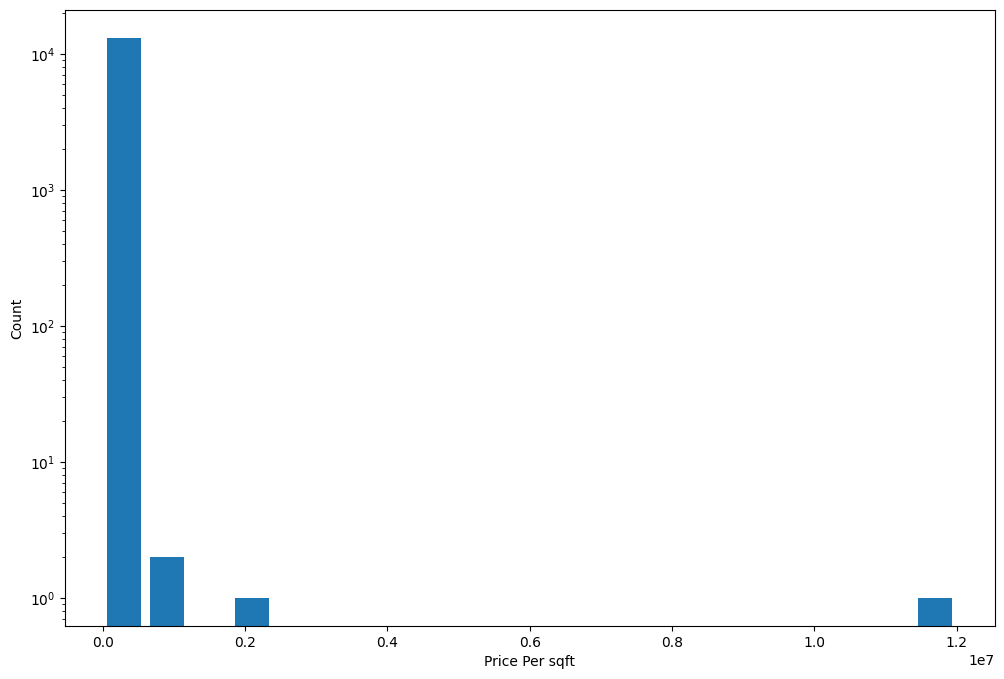

In [5]:
plt.hist(df.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price Per sqft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [7]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [10]:
outliers = df[(df.price_per_sqft > upper_limit) | (df.price_per_sqft < lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
1005,other,1 BHK,15.0,1.0,30.0,1,200000
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
7575,other,1 BHK,425.0,1.0,750.0,1,176470


In [12]:
df2 = df[(df.price_per_sqft < upper_limit) & (df.price_per_sqft > lower_limit)]
df2.shape

(13172, 7)

In [13]:
df.shape

(13200, 7)

In [14]:
df.shape[0] - df2.shape[0]

28

In [15]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [16]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3605,other,4 Bedroom,2700.0,6.0,675.0,4,25000
6709,Malleshwaram,4 Bedroom,4000.0,4.0,1100.0,4,27500
1770,other,10 Bedroom,1660.0,10.0,475.0,10,28614
1705,other,4 Bedroom,1700.0,2.0,550.0,4,32352
1721,other,5 Bedroom,2400.0,5.0,625.0,5,26041
3488,Banashankari Stage III,8 Bedroom,1200.0,7.0,350.0,8,29166
9360,HAL 2nd Stage,4 Bedroom,2280.0,4.0,615.0,4,26973
3128,Malleshwaram,4 Bedroom,5500.0,5.0,1500.0,4,27272
1548,Uttarahalli,5 Bedroom,400.0,5.0,200.0,5,50000
6959,Raja Rajeshwari Nagar,4 Bedroom,1350.0,4.0,340.0,4,25185


In [17]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [18]:
df2.shape[0]-df3.shape[0]

125

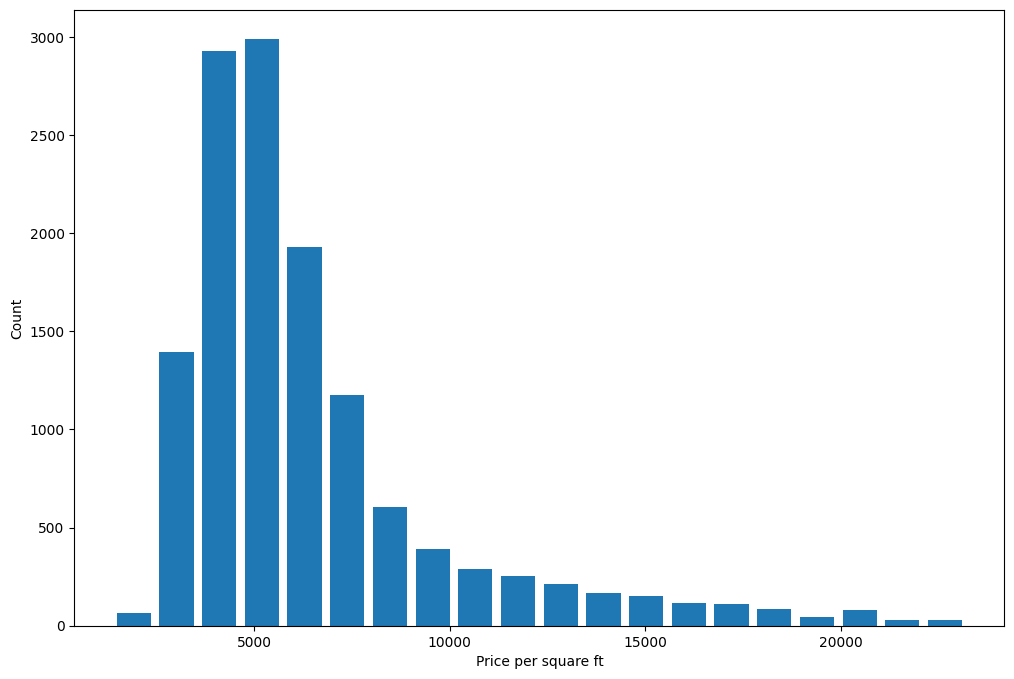

In [19]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

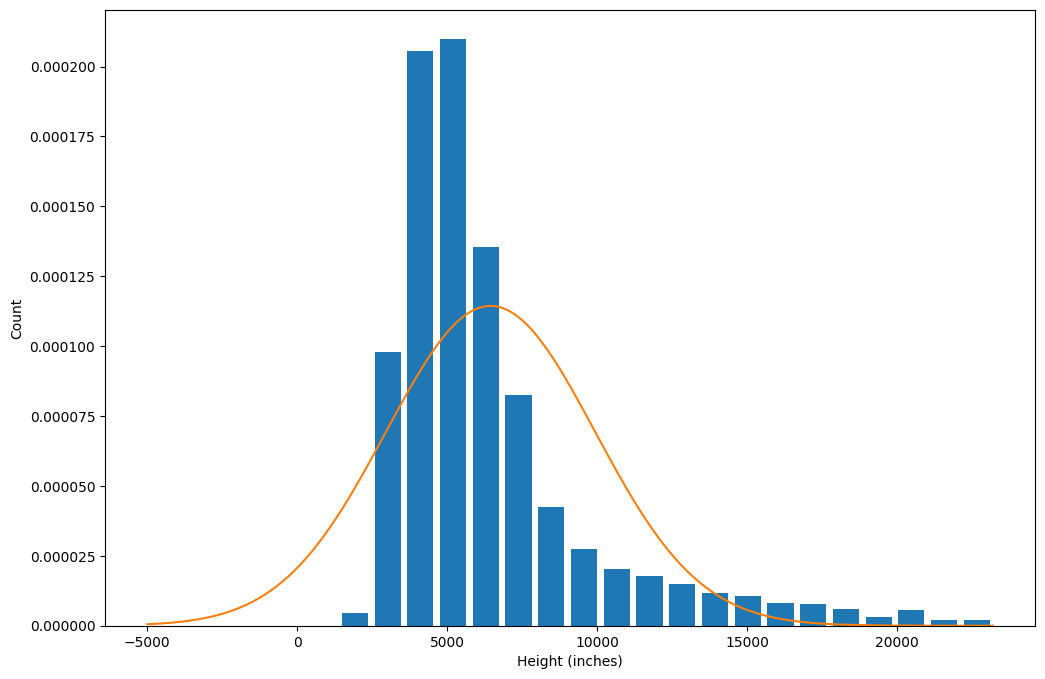

In [20]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [21]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-21-70754eb1335e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
7350,Ananth Nagar,2 BHK,960.0,2.0,37.00,2,3854,-0.678493
11695,Yelahanka,3 BHK,1355.0,2.0,75.00,3,5535,-0.272554
5070,other,2 BHK,1250.0,2.0,59.00,2,4720,-0.469366
3714,other,3 BHK,1320.0,2.0,73.00,3,5530,-0.273762
7880,Gunjur,2 BHK,1175.0,2.0,43.48,2,3700,-0.715682
7501,other,6 Bedroom,1050.0,4.0,155.00,6,14761,1.955399
3207,other,3 Bedroom,1200.0,3.0,200.00,3,16666,2.415430
11427,other,3 BHK,1250.0,2.0,77.13,3,6170,-0.119211
11783,Hebbal,2 BHK,1420.0,2.0,99.26,2,6990,0.078808
6707,other,2 BHK,1175.0,2.0,79.00,2,6723,0.014331


In [23]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore > 4)]
outliers_z.shape

(125, 8)

In [24]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9099,Whitefield,3 BHK,1496.0,2.0,718.0,3,47994,9.980715
12051,Malleshwaram,5 Bedroom,3000.0,4.0,900.0,5,30000,5.635409
5144,Rajaji Nagar,3 Bedroom,2790.0,3.0,950.0,3,34050,6.613429
5315,Banashankari Stage II,4 Bedroom,1500.0,2.0,650.0,4,43333,8.855147
9786,2nd Stage Nagarbhavi,5 Bedroom,1200.0,5.0,290.0,5,24166,4.226578


In [25]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [26]:
df2.shape[0] - df4.shape[0]

125